In [13]:
import pandas as pd

csv_file =  "C:\\Users\\Eros\\Desktop\\amz_uk_price_prediction_dataset.csv (1)\\amz_uk_price_prediction_dataset.csv"
ama_data = pd.read_csv(csv_file)

ama_data

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [ ]:
#Part 1

In [15]:
crosstab = pd.crosstab(ama_data['category'], ama_data['isBestSeller'])
crosstab


isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [17]:
crosstab['best_seller_proportion'] = crosstab[True] / (crosstab[True] + crosstab[False])
sorted_crosstab = crosstab.sort_values(by='best_seller_proportion', ascending=False)
sorted_crosstab


isBestSeller,False,True,best_seller_proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [ ]:
# Part 2

In [19]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(crosstab.iloc[:, :2])
chi2, p


(36540.20270061387, 0.0)

In [21]:
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

cramers_v(crosstab.iloc[:, :2])


0.1222829439760564

In [ ]:
# Part 3

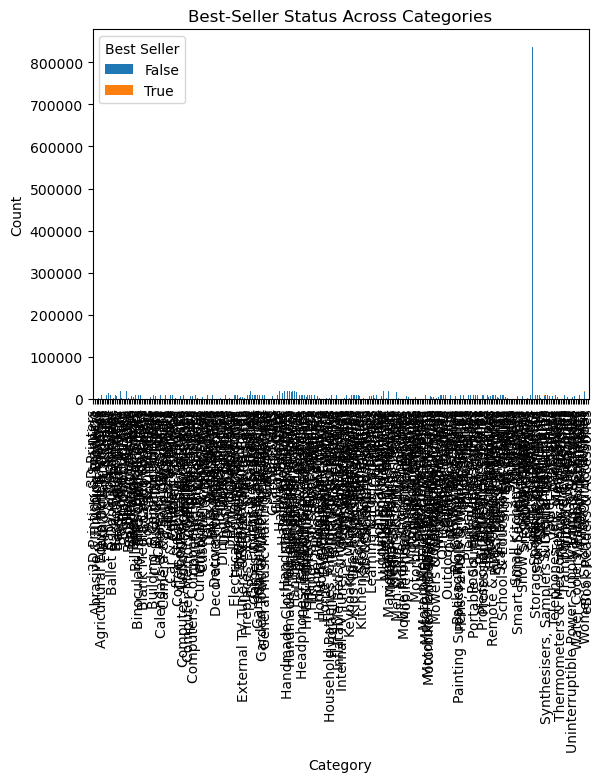

In [23]:
import matplotlib.pyplot as plt

crosstab_plot = crosstab.drop(columns='best_seller_proportion')
crosstab_plot.plot(kind='bar', stacked=True)
plt.title('Best-Seller Status Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Best Seller')
plt.show()


In [25]:
# Part 4

In [27]:
Q1 = ama_data['price'].quantile(0.25)
Q3 = ama_data['price'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = ama_data[~((ama_data['price'] < (Q1 - 1.5 * IQR)) | (ama_data['price'] > (Q3 + 1.5 * IQR)))]


In [29]:
#Part 5

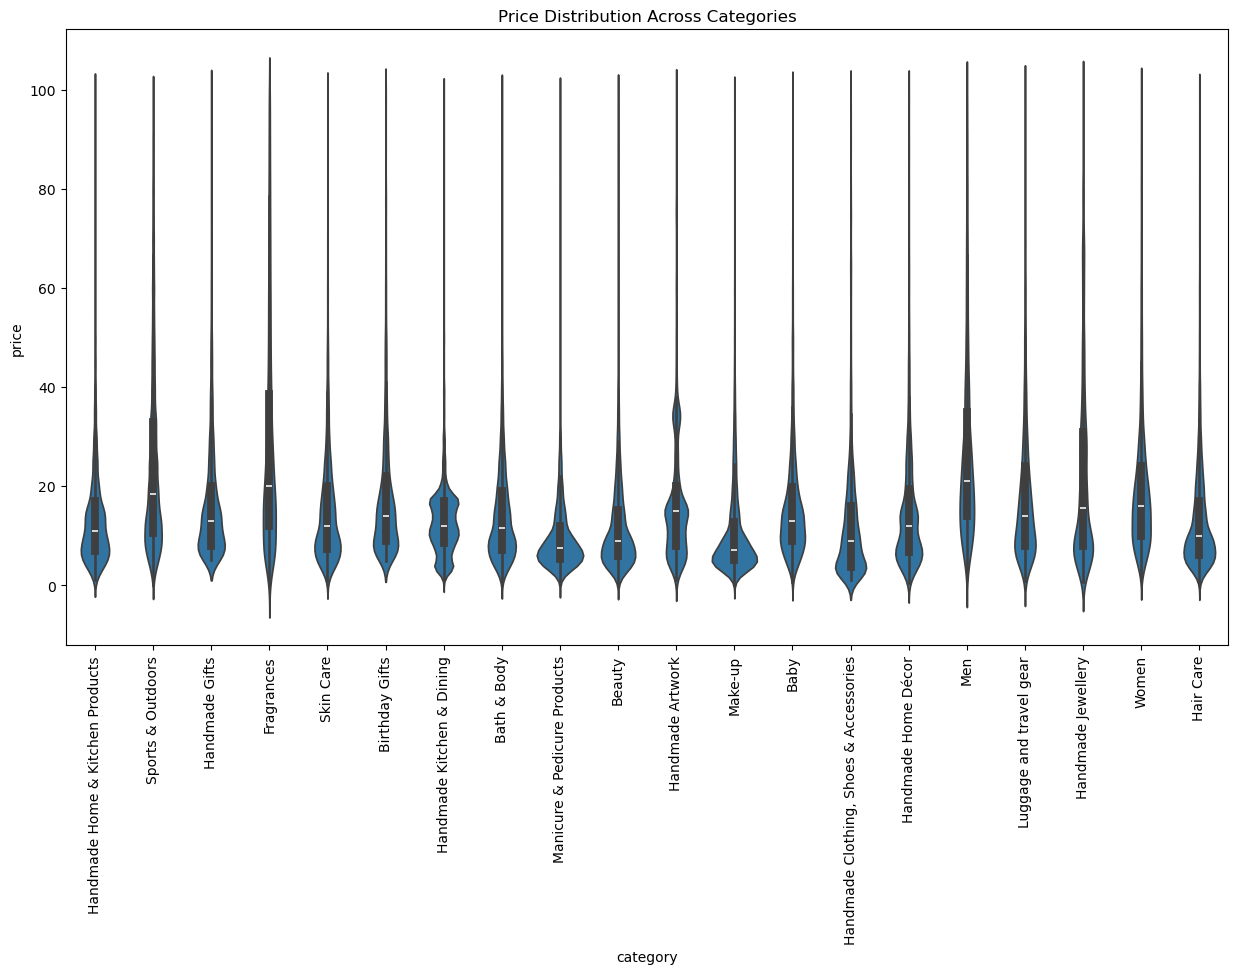

In [31]:
import seaborn as sns

top_20_categories = filtered_data['category'].value_counts().nlargest(20).index
filtered_top_20 = filtered_data[filtered_data['category'].isin(top_20_categories)]

plt.figure(figsize=(15, 8))
sns.violinplot(x='category', y='price', data=filtered_top_20)
plt.title('Price Distribution Across Categories')
plt.xticks(rotation=90)
plt.show()


In [33]:
median_prices = filtered_data.groupby('category')['price'].median().sort_values(ascending=False)
highest_median_price_category = median_prices.idxmax()
highest_median_price_category, median_prices[highest_median_price_category]


('Desktop PCs', 74.0)

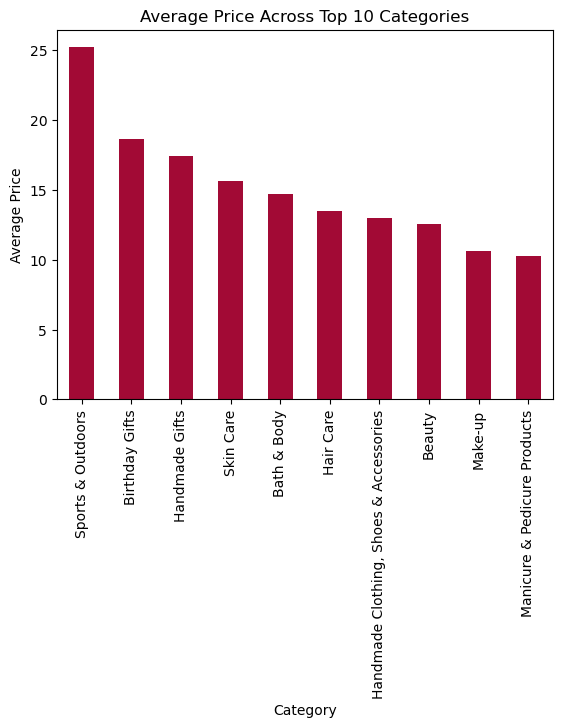

In [35]:
top_10_categories = filtered_data['category'].value_counts().nlargest(10).index
filtered_top_10 = filtered_data[filtered_data['category'].isin(top_10_categories)]

average_prices = filtered_top_10.groupby('category')['price'].mean().sort_values(ascending=False)
average_prices.plot(kind='bar', color='#a20a35')
plt.title('Average Price Across Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()


In [37]:
highest_avg_price_category = average_prices.idxmax()
highest_avg_price_category, average_prices[highest_avg_price_category]


('Sports & Outdoors', 25.17206487036301)

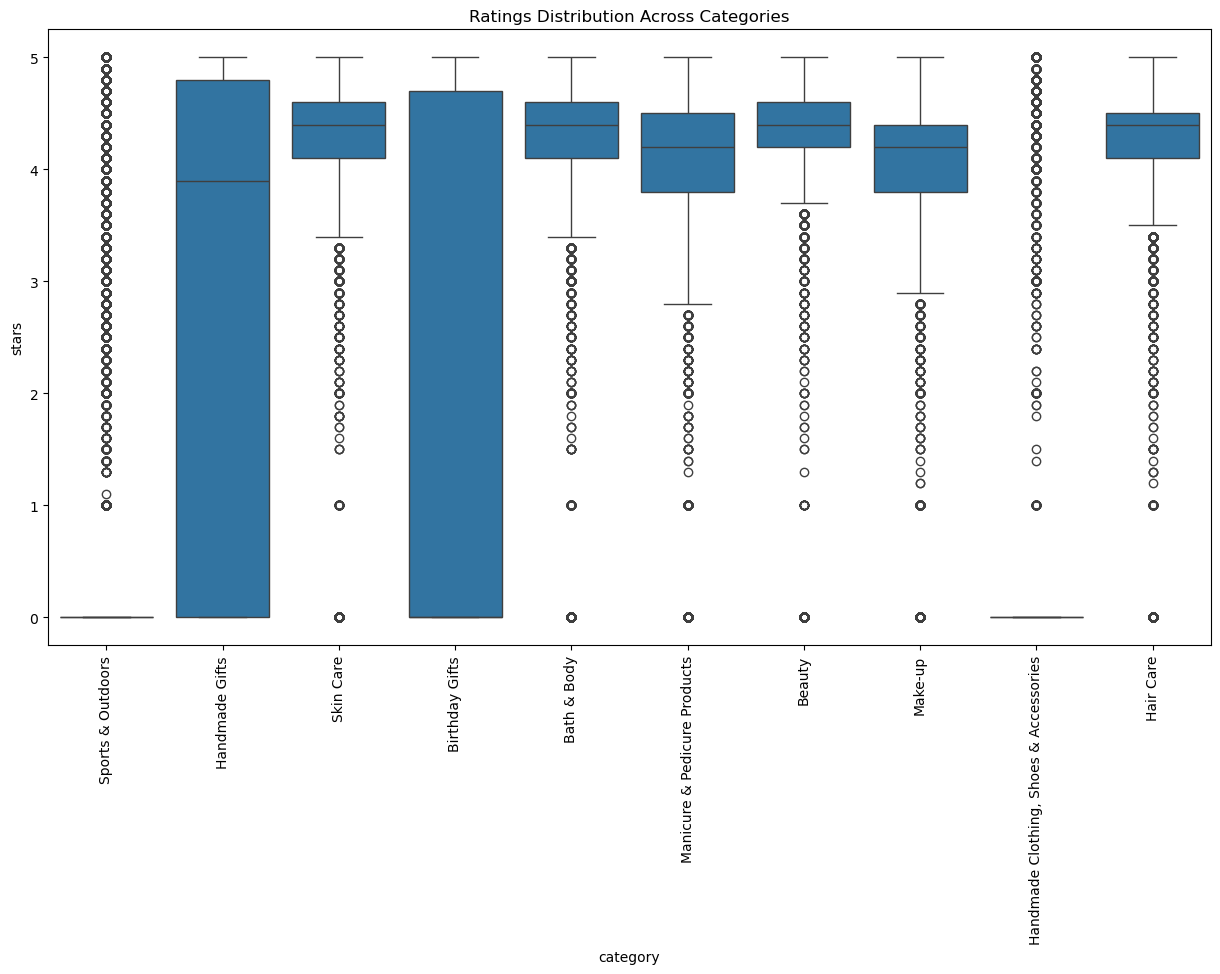

In [39]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='category', y='stars', data=filtered_top_10)
plt.title('Ratings Distribution Across Categories')
plt.xticks(rotation=90)
plt.show()


In [41]:
median_ratings = filtered_data.groupby('category')['stars'].median().sort_values(ascending=False)
highest_median_rating_category = median_ratings.idxmax()
highest_median_rating_category, median_ratings[highest_median_rating_category]


('Computer Memory', 4.7)

In [43]:
correlation = filtered_data['price'].corr(filtered_data['stars'])
correlation


-0.0776729987818137

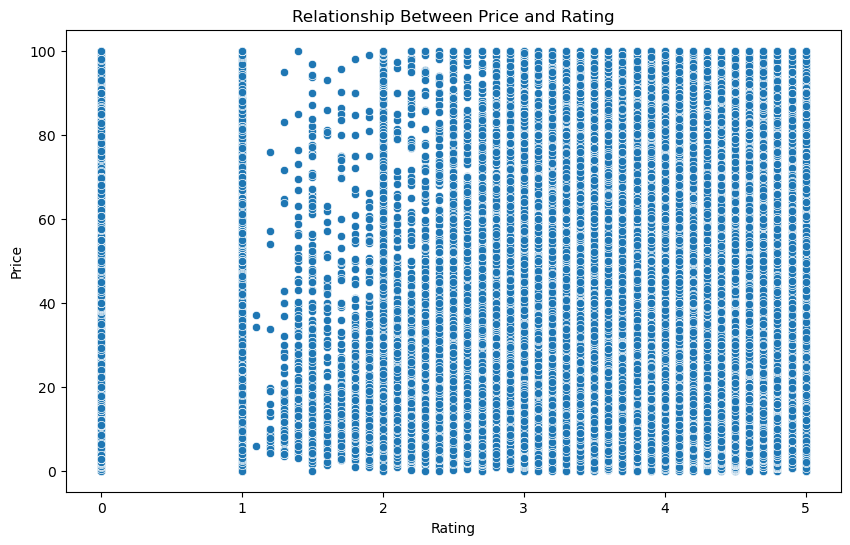

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=filtered_data)
plt.title('Relationship Between Price and Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()


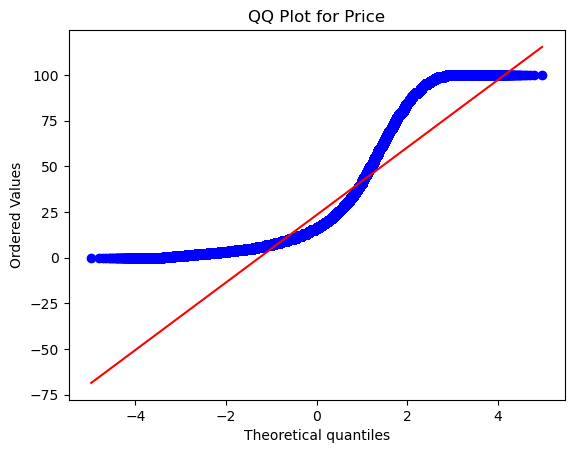

In [51]:
import scipy.stats as stats

stats.probplot(filtered_data['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Price')
plt.show()
